# SciPy包介绍
SciPy（Scientific Python）是一个用于数学、科学和工程应用的开源Python库。它在NumPy库的基础上构建，并提供了大量的用于优化、积分、插值、特殊函数、信号和图像处理等任务的模块和函数。

[SciPy文档(中文)](https://www.osgeo.cn/scipy/)

[SciPy官方文档(英文)](https://docs.scipy.org/doc//scipy/index.html)

为什么使用SciPy：
* SciPy提供了比NumPy更多的科学计算功能和算法。
* 适用于统计学、信号处理、图像分析、线性代数等多个领域。

## 插值与拟合

插值：求过已知有限个数据点的近似函数。

拟合：已知有限个数据点，求近似函数，不要求过已知数据点，只要求在某种意义下它在这些点上的总偏差最小。

插值和拟合都是要根据一组数据构造一个函数作为近似，由于近似的要求不同，二者的数学方法上是完全不同的。而面对一个实际问题，究竟应该用插值还是拟合，有时容易确定，有时则并不明显。

### 常用插值方法

| 插值方法           | 优点                                         | 缺点                                                         | 对应函数             |
| ------------------ | -------------------------------------------- | ------------------------------------------------------------ | -------------------- |
| 拉格朗日多项式插值 | 理解和实现都相对简单                         | 随着数据点数量的增加，计算复杂度快速上升。<br />易于产生Runge现象，即在区间的端点附近出现剧烈震荡。 | `lagrange`           |
| 分段线性插值       | 计算简单，速度快                             | 不能很好地逼近复杂的函数形状                                 | `interp1d`           |
| Hermite插值        | 除了函数值外，还可以考虑导数，因此通常更精确 | 需要更多的数据信息（例如：导数）                             | `CubicHermiteSpline` |
| 三次样条插值       | 可以提供较为平滑和精确的逼近                 | 对于不平滑或者具有突变的函数，可能不太适用                   | `CubicSpline`        |

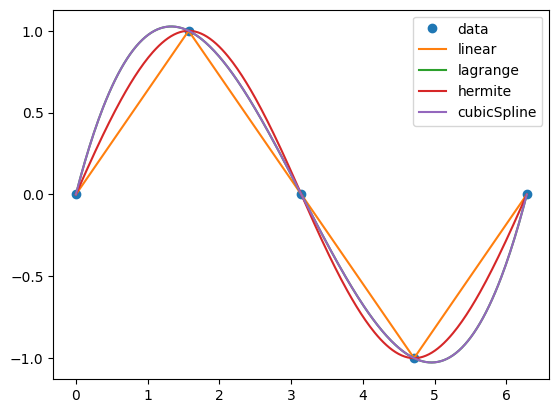

In [1]:
import numpy as np
from scipy.interpolate import CubicSpline, interp1d, lagrange, CubicHermiteSpline
import matplotlib.pyplot as plt

# 生成数据
X = np.linspace(0, 2*np.pi, 5)
Y = np.sin(X)
dY = np.cos(X)

# 插值方法
f_linear = interp1d(X, Y, kind='linear')
f_lagrange = lagrange(X, Y)
f_hermite = CubicHermiteSpline(X, Y, dY)
f_cubicSpline = CubicSpline(X, Y)

# 绘图
fig, ax = plt.subplots()
x_new = np.linspace(0, 2*np.pi, 300)  # 用于插值函数的新数据点

ax.plot(X, Y, 'o', label='data')
ax.plot(x_new, f_linear(x_new), label='linear')
ax.plot(x_new, f_lagrange(x_new), label='lagrange')
ax.plot(x_new, f_hermite(x_new), label='hermite')
ax.plot(x_new, f_cubicSpline(x_new), label='cubicSpline')

ax.legend()
plt.show()

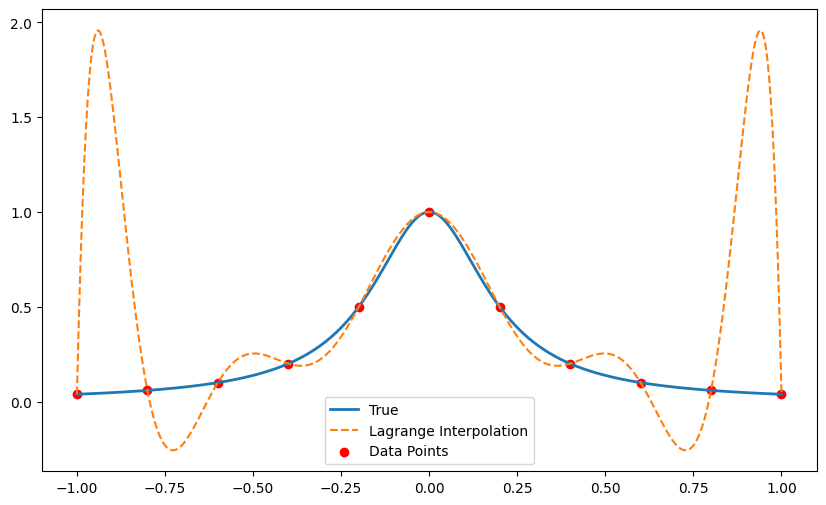

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

def example_function(x):
    return 1 / (1 + 25 * x ** 2)

x = np.linspace(-1, 1, 11)
y = example_function(x)

# 进行拉格朗日插值
polynomial = lagrange(x, y)

# 生成用于绘图的点
x_plot = np.linspace(-1, 1, 400)
y_plot = example_function(x_plot)
y_lagrange = polynomial(x_plot)

# 绘图
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_plot, y_plot, label='True', linewidth=2)
ax.plot(x_plot, y_lagrange, label='Lagrange Interpolation', linestyle='--')
ax.scatter(x, y, color='red', label='Data Points')
ax.legend()
plt.show()

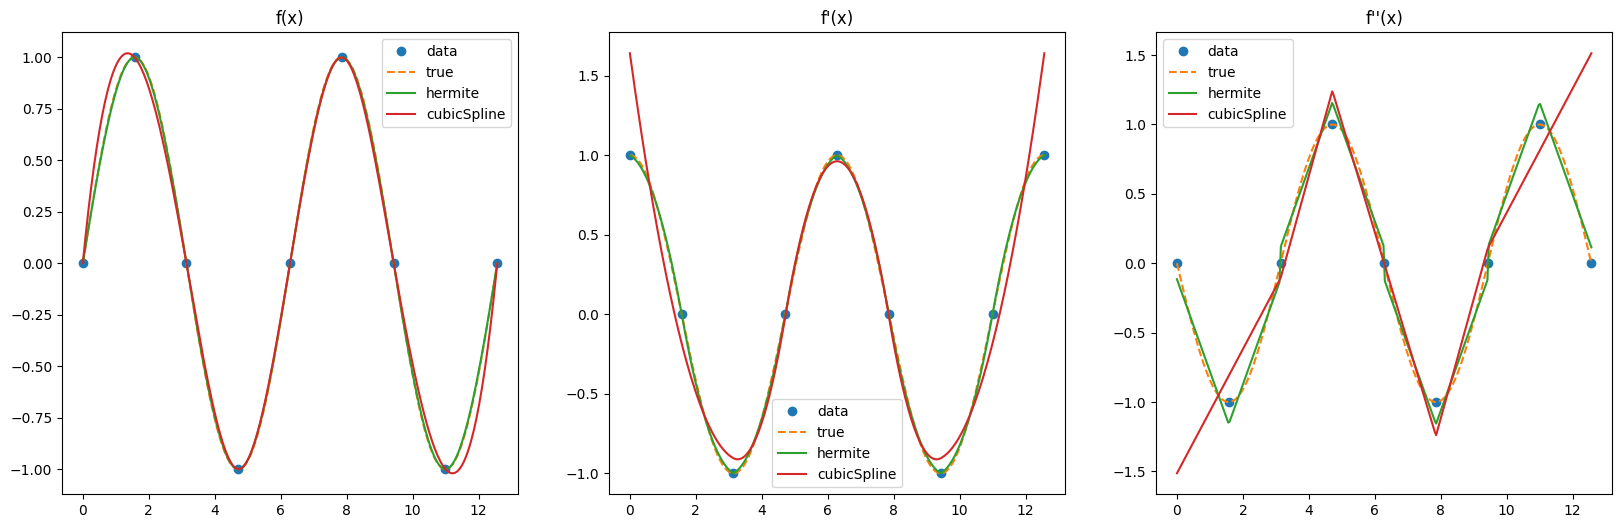

In [3]:
import numpy as np
from scipy.interpolate import CubicSpline, CubicHermiteSpline
import matplotlib.pyplot as plt

X = np.linspace(0, 4*np.pi, 9)
Y = np.sin(X)
dY = np.cos(X)

f_hermite = CubicHermiteSpline(X, Y, dY)
f_cubicSpline = CubicSpline(X, Y)

# 绘图
fig, ax = plt.subplots(1,3,figsize=(20, 6))
x_new = np.linspace(0, 4*np.pi, 300)  # 用于插值函数的新数据点

ax[0].plot(X, Y, 'o', label='data')
ax[0].plot(x_new, np.sin(x_new), '--', label='true')
ax[0].plot(x_new, f_hermite(x_new), label='hermite')
ax[0].plot(x_new, f_cubicSpline(x_new), label='cubicSpline')
ax[0].legend()
ax[0].set_title('f(x)')

ax[1].plot(X, dY, 'o', label='data')
ax[1].plot(x_new, np.cos(x_new), '--', label='true')
ax[1].plot(x_new, f_hermite(x_new,1), label='hermite')
ax[1].plot(x_new, f_cubicSpline(x_new,1), label='cubicSpline')
ax[1].legend()
ax[1].set_title('f\'(x)')

ax[2].plot(X, -Y, 'o', label='data')
ax[2].plot(x_new, -np.sin(x_new), '--', label='true')
ax[2].plot(x_new, f_hermite(x_new,2), label='hermite')
ax[2].plot(x_new, f_cubicSpline(x_new,2), label='cubicSpline')
ax[2].legend()
ax[2].set_title('f\'\'(x)')

plt.show()

### 拟合

SciPy在`scipy.optimize`子包中提供了`curve_fit`，用于函数拟合。其使用非线性最小二乘法拟合函数。

**注意：** 对于最小二乘法来说，如果遇到非凸优化问题，也就是局部极小值不是全局最小值的时候，可能需要用户手动调整初始参数，来达到一个较好的结果。

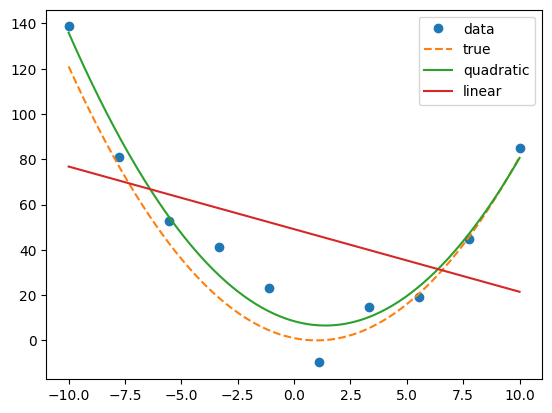

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 定义函数
def example_function(x):
    return 1 * x**2 + (-2) * x + 1

def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

def linear_function(x, a, b):
    return a * x + b

# 实验数据
np.random.seed(0)
X = np.linspace(-10, 10, 10)
Y = example_function(X) + np.random.normal(0, 10, 10)

# 执行拟合
params_q, _ = curve_fit(quadratic_function, X, Y, p0=[1, 1, 1])
params_l, _ = curve_fit(linear_function, X, Y, p0=[1, 1])

fig, ax = plt.subplots()
x_new = np.linspace(-10, 10, 300)

ax.plot(X, Y, 'o', label='data')
ax.plot(x_new, example_function(x_new), '--', label='true')
ax.plot(x_new, quadratic_function(x_new, *params_q), label='quadratic')  # *用于解包params_q，将其中每一个元素作为独立的参数传递给quadratic_function
ax.plot(x_new, linear_function(x_new, *params_l), label='linear')
ax.legend()

plt.show()

## 求解代数方程
在SciPy中，解代数方程通常使用`fsolve`函数。这个函数用于寻找非线性方程`f(x)=0`的根。

**注意：**`fsolve`是一个迭代算法，需要一个初始猜测值来开始寻找根。根据这个初始值，算法可能会收敛到不同的解。因此，在使用`fsolve`时，选择合适的初始猜测值是很重要的。

我们接下来进行一个演示，假设我们需要求解方程

$$x^2 + 6 = 5x$$

首先，我们需要将其化为一下形式

$$x^2 -5x + 6 = 0$$

我们注意到，这个二次方程是有2个解的，$x=2$和$x=3$，我们将展示，初始猜测值的影响。

In [5]:
from scipy.optimize import fsolve

def equation(x):
    return x**2 - 5*x + 6

# 选择一个初始猜测值
initial_guess = 1.5
root = fsolve(equation, initial_guess)
print("初始猜测为1.5时，方程的根为：", root)

# 选择一个初始猜测值
initial_guess = 3.5
root = fsolve(equation, initial_guess)
print("初始猜测为3.5时，方程的根为：", root)

初始猜测为1.5时，方程的根为： [2.]
初始猜测为3.5时，方程的根为： [3.]


我们展示一个稍微复杂一点的例子，求解下述方程组

$$\begin{cases}x_0*\cos(x_1) = 4\\x_1*x_0 - x_1 = 5\end{cases}$$

我们还是需要先将其变为

$$\begin{cases}x_0*\cos(x_1) -4 = 0\\x_1*x_0 - x_1 -5 = 0\end{cases}$$

In [6]:
import numpy as np
from scipy.optimize import fsolve
def equation(x):
    return [x[0] * np.cos(x[1]) - 4,
            x[1] * x[0] - x[1] - 5]

root = fsolve(equation, [1, 1])
print("方程组的根为：", root)

方程组的根为： [6.50409711 0.90841421]


## 求解常微分方程
SciPy库中`scipy.integrate`子库的`solve_ivp`函数（Initial-Value Problem Solver，初值问题求解器）常用于解常微分方程。该函数提供了多种数值方法，如龙格库塔方法、BDF方法等，用于解决初值问题。
> 一些较老的文章，可能使用`scipy.integrate.odeint`对常微分方程进行求解，但是现在不太推荐

我们先从一个简单的问题入手，我们希望求解方程

$$\begin{cases}\frac{\mathrm{d}x}{\mathrm{d}t}=4x\\x(0)=1\end{cases}$$

当然我们知道，这个方程的解是$x = e^{4t}$

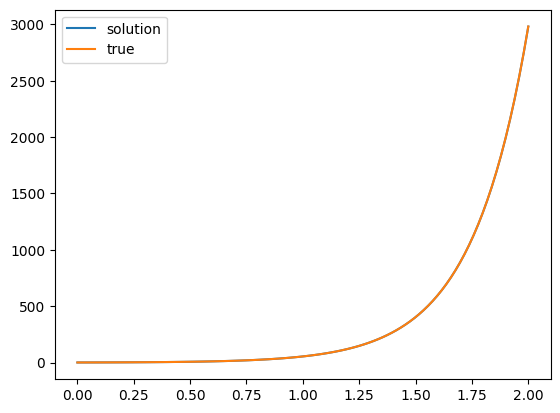

<class 'scipy.integrate._ivp.ivp.OdeResult'>
  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.020e-02 ...  1.980e+00  2.000e+00]
        y: [[ 1.000e+00  1.084e+00 ...  2.748e+03  2.980e+03]]
      sol: None
 t_events: None
 y_events: None
     nfev: 44
     njev: 0
      nlu: 0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [7]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

def pendulum_equations(t, y):
    dydt = [4*y[0]]
    return dydt

initial_conditions = [1]   #初始条件
t_span = [0,2]             #时间区间
t_eval = np.linspace(0,2,100)             #返回解用的时间点

solution = solve_ivp(pendulum_equations, t_span, initial_conditions, t_eval=t_eval)

fig, ax = plt.subplots()
ax.plot(solution.t, solution.y[0], label='solution')
ax.plot(solution.t, np.exp(4*solution.t), label='true')

ax.legend()
plt.show()

print(type(solution))
print(solution)
print(solution.t - t_eval)

我们观察一个稍微复杂一点的例子：

我们观察一下，下面这个方程

我们展示一个稍微复杂一点的例子，求解下述方程组

$$\begin{cases}m\frac{d^2x}{dt^2}+c\frac{dx}{dt}+kx=0\\x(0)=5\\\frac{dx}{dt}(0)=0\end{cases}$$

我们用$y_0$，$y_1$表示$x$，$\frac{dx}{dt}$，我们可以整理得到

$$\begin{cases}\dfrac{dy_1}{dt}=-\dfrac{c}{m}y_1-\dfrac{k}{m}y_0\\\dfrac{dy_0}{dt}=y_1\\y_1(0)=0,y_0(0)=5\end{cases}$$

我们考虑$m=1,c=0.5,k=4$的特殊情况

我们知道，这个方程的解应该是

$$x(t)=e^{-0.25 t}\left[5\cos(2\sqrt{1-0.125^2}\times t)+\frac{1.25}{2\sqrt{1-0.125^2}}\sin(2\sqrt{1-0.125^2}\times t)\right]$$

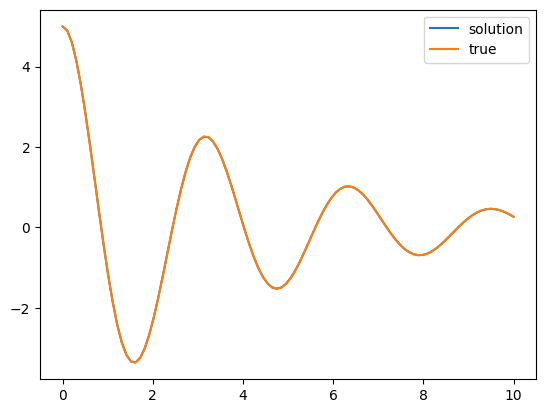

In [8]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

def pendulum_equations(t, y):
    dydt = [y[1],-0.5*y[1]-4*y[0]]
    return dydt

initial_conditions = [5,0]   #初始条件
t_span = [0,10]             #时间区间
t_eval = np.linspace(0,10,100)             #返回解用的时间点

solution = solve_ivp(pendulum_equations, t_span, initial_conditions, t_eval=t_eval)

# 定义常数和方程参数
zeta = 0.125
omega_n = 2
x0 = 5
v0 = 0
omega_d = omega_n * np.sqrt(1 - zeta**2)
x_t = np.exp(-2 * zeta * t_eval) * (x0 * np.cos(omega_d * t_eval) + (v0 + zeta * omega_n * x0) / omega_d * np.sin(omega_d * t_eval))


fig, ax = plt.subplots()
ax.plot(solution.t, solution.y[0], label='solution')
ax.plot(t_eval, x_t, label='true')

ax.legend()

plt.show()

## 数值积分

使用`scipy.integrate`子包中提供了`quad`用于一维数值积分。`quad`函数接受被积函数、积分下限和积分上限作为输入，返回积分结果和估计的误差。

下面我们将展示如何求$sin(x)$在$[0,\pi]$上的数值积分，我们知道，结果应该是2

In [9]:
from scipy.integrate import quad
import numpy as np

# 定义被积函数
def integrand(x):
    return np.sin(x)

# 进行数值积分
result, error = quad(integrand, 0, np.pi)

# 输出结果
print(f"积分结果：{result}, 估计误差：{error}")

积分结果：2.0, 估计误差：2.220446049250313e-14


## 线性优化

SciPy库包含一个用于优化问题的模块：`scipy.optimize`。该模块提供了多种工具，用于求解无约束或带约束的优化问题，其中包括线性优化。我们今天仅仅以线性优化为例。`scipy.optimize.linprog`是用于解决线性规划问题的函数。这个函数接受目标函数的系数、约束条件的系数矩阵和边界值，并返回最优解和优化状态。

使用`scipy.optimize.linprog`函数时，线性规划问题需要被表述成下述形式：

![线性规划](linprog.png)

我们观察下面这个线性优化问题

$$\begin{aligned}\max\quad z=4x_1+3x_2\\s.t.\begin{cases}2x_1+x_2\leq10\\x_1+x_2\leq8\\x_2\leq7\\x_1,x_2\geq0\end{cases}\end{aligned}$$

观察下面的图像，我们容易知道，上述问题的最优解为[2,6]，最优值为26

![线性规划图解法](linprog2.png)

In [10]:
from scipy.optimize import linprog

# 定义目标函数系数，这是希望被最小化的函数，如果你需要求最大化，取反即可
c = [-4, -3]

# 定义约束条件矩阵和常数（注意：这里是小于等于形式）
A = [[2, 1], [1, 1]]
b = [10, 8]

# 定义变量边界
x0_bounds = (0, None)
x1_bounds = (0, 7)

# 进行线性优化
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds])

# 输出结果
print(f"最优解：{res.x}, 最优值：{res.fun}")

最优解：[2. 6.], 最优值：-26.0
